In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scripts.data_loader import load_caravan

In [39]:
# ---------------------------
# 1) Load data and names
# ---------------------------
train, test, X, y, TARGET = load_caravan(data_dir="./data")
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (5822, 86)
Test shape: (4000, 85)


In [32]:
# ---------------------------
# 2) Quick data profile
# ---------------------------
print("=== Shapes ===")
print(pd.DataFrame({"Dataset":["Train","Test"], "Rows":[len(train),len(test)], "Cols":[train.shape[1], test.shape[1]]}).to_string(index=False))

# Dtypes, missing values
print("\n=== Dtypes (Train) ===")
print(train.dtypes.to_string())

missing = train.isna().sum()
n_miss_cols = int((missing > 0).sum())
print(f"\nColumns with missing values in TRAIN: {n_miss_cols}")
missing = test.isna().sum()
miss_cols = int((missing > 0).sum())
print(f"\nColumns with missing values in TRAIN: {miss_cols}")
if n_miss_cols:
    print(missing[missing > 0].sort_values(ascending=False).to_string())

=== Shapes ===
Dataset  Rows  Cols
  Train  5822    86
   Test  4000    85

=== Dtypes (Train) ===
Customer Subtype                                    int64
Number of houses                                    int64
Avg size household                                  int64
Avg age                                             int64
Customer main type                                  int64
Roman catholic                                      int64
Protestant                                          int64
Other religion                                      int64
No religion                                         int64
Married                                             int64
Living together                                     int64
Other relation                                      int64
Singles                                             int64
Household without children                          int64
Household with children                             int64
High level education           


=== Target class balance (TRAIN) ===
  Class  Count  Percent
 No (0)   5474    94.02
Yes (1)    348     5.98


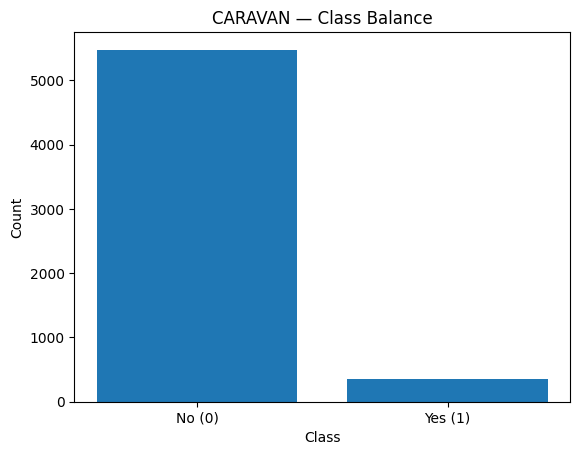

In [33]:
# ---------------------------
# 3) Target (class) balance
# ---------------------------

TARGET = "CARAVAN"
counts = train[TARGET].value_counts().sort_index()
balance = pd.DataFrame({
    "Class": ["No (0)","Yes (1)"],
    "Count": [int(counts.get(0,1)), int(counts.get(1,1))],
    "Percent": [round(100*counts.get(0,0)/len(train),2), round(100*counts.get(1,0)/len(train),2)]
})
print("\n=== Target class balance (TRAIN) ===")
print(balance.to_string(index=False))

# Target bar
plt.figure()
plt.bar(["No (0)","Yes (1)"], [counts.get(0,0), counts.get(1,0)])
plt.title("CARAVAN — Class Balance")
plt.xlabel("Class"); plt.ylabel("Count")
plt.show()

The Imbalanced class can cause:

The model to become biased towards the majority class (0 in this case) because it sees many more examples of this class during training.
Standard metrics like accuracy can be misleading. For example, if a model always predicts the majority class (0), it will have a high accuracy (~94%) but will completely fail to predict the minority class (1).
Precision, recall, and F1-score are more informative metrics in imbalanced scenarios.

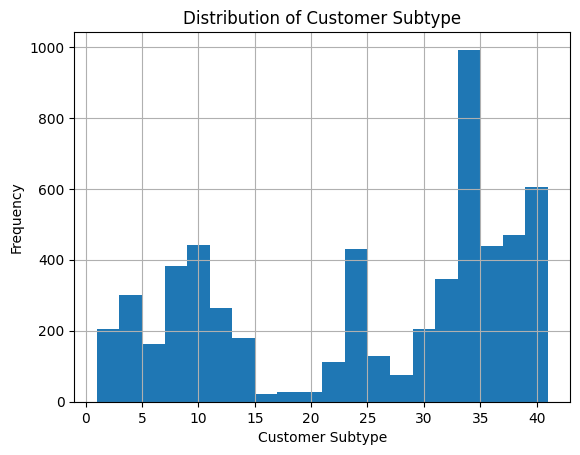

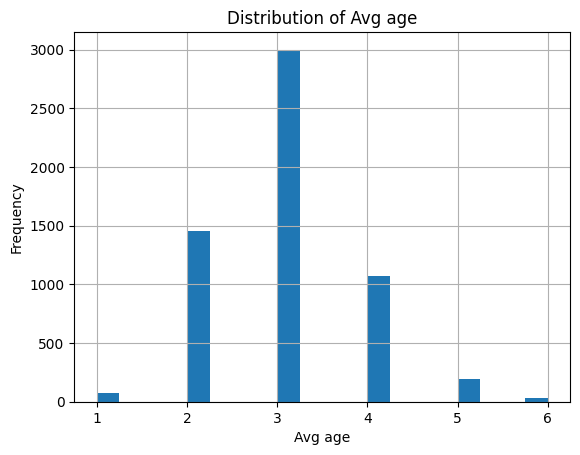

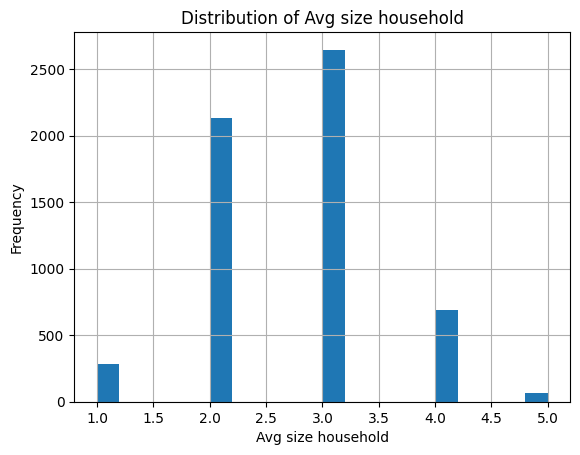

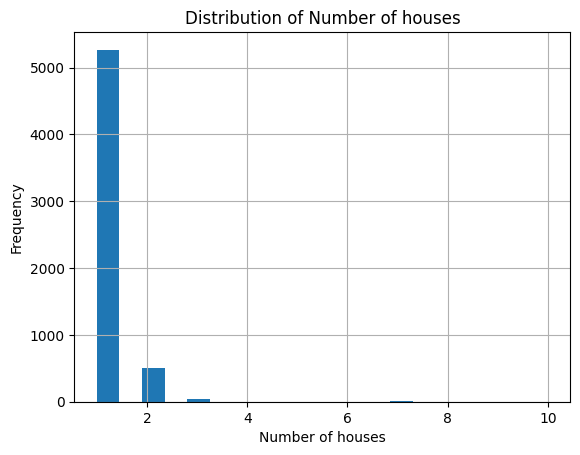

In [34]:
# ---------------------------
# 4) Explore some feature distributions
# ---------------------------

for feat in ['Customer Subtype', 'Avg age', 'Avg size household', 'Number of houses']:
    if feat in train.columns:
        plt.figure()
        train[feat].hist(bins=20)
        plt.title(f"Distribution of {feat}")
        plt.xlabel(feat); plt.ylabel("Frequency")
        plt.show()


=== Customer Subtype ===
                  count  pos_rate
Customer Subtype                 
1                   124  0.104839
2                    82  0.073171
3                   249  0.100402
4                    52  0.038462
5                    45  0.044444
6                   119  0.100840
7                    44  0.068182
8                   339  0.150442
9                   278  0.043165
10                  165  0.054545
11                  153  0.058824
12                  111  0.144144
13                  179  0.072626
15                    5  0.000000
16                   16  0.000000
17                    9  0.000000
18                   19  0.000000
19                    3  0.000000
20                   25  0.080000
21                   15  0.000000
22                   98  0.040816
23                  251  0.015936
24                  180  0.027778
25                   82  0.024390
26                   48  0.020833
27                   50  0.020000
28                   2

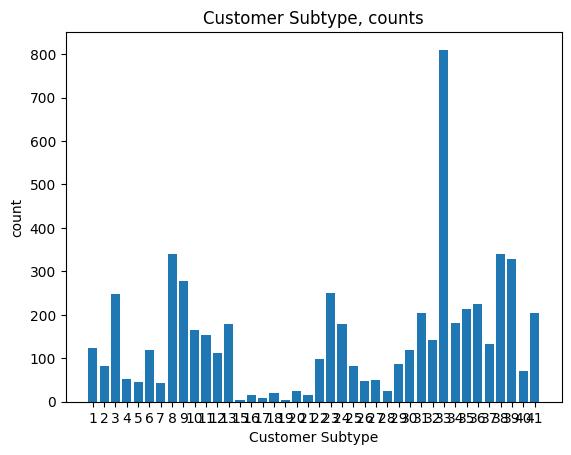

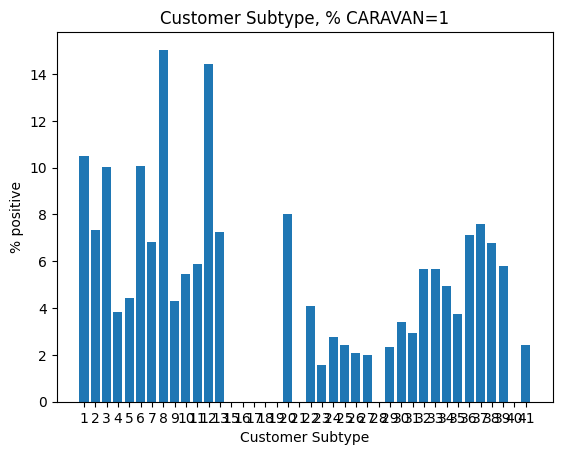


=== Avg age ===
         count  pos_rate
Avg age                 
1           74  0.013514
2         1452  0.059917
3         3000  0.061000
4         1073  0.059646
5          193  0.062176
6           30  0.033333


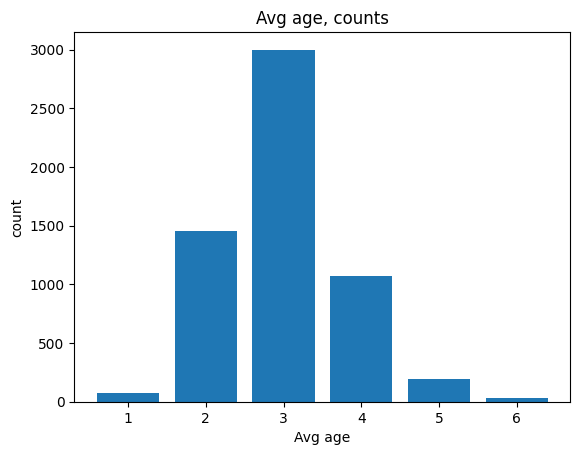

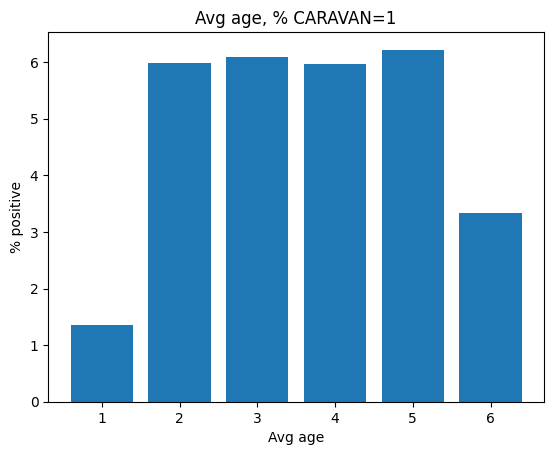


=== Avg size household ===
                    count  pos_rate
Avg size household                 
1                     284  0.028169
2                    2131  0.053965
3                    2646  0.064626
4                     693  0.072150
5                      68  0.058824


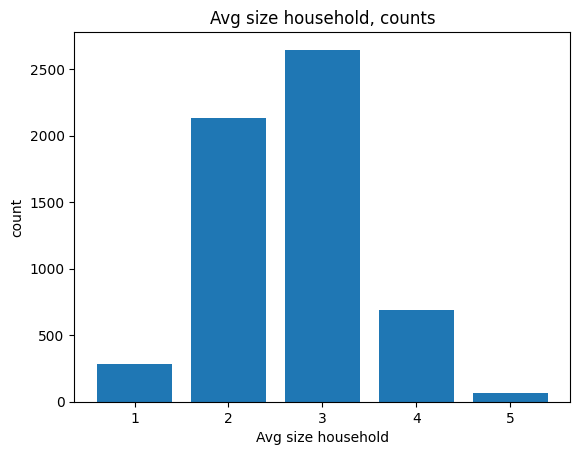

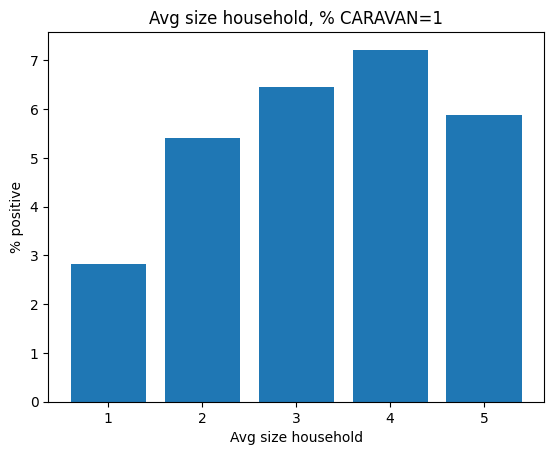


=== Number of houses ===
                  count  pos_rate
Number of houses                 
1                  5267  0.059806
2                   505  0.065347
3                    39  0.000000
4                     2  0.000000
5                     1  0.000000
6                     1  0.000000
7                     5  0.000000
8                     1  0.000000
10                    1  0.000000


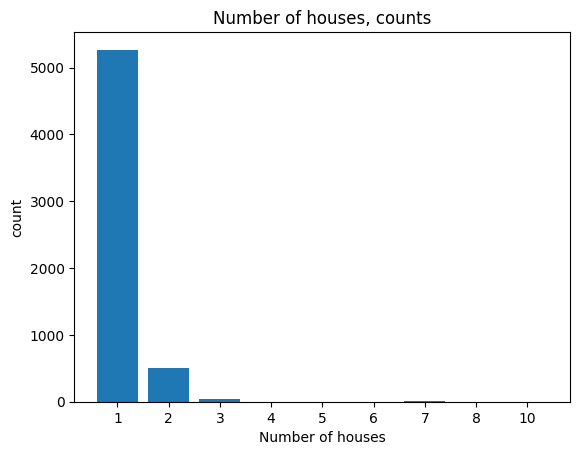

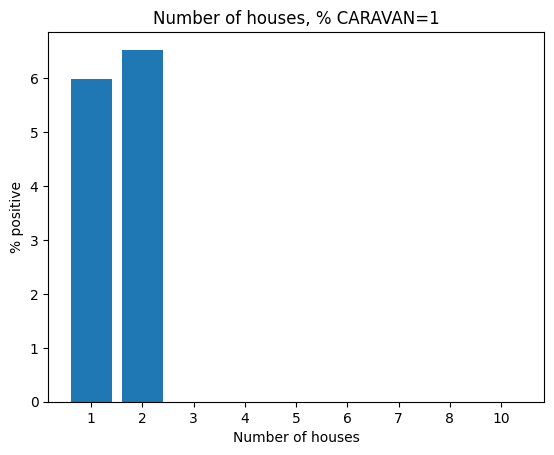

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

TARGET = "CARAVAN"

def counts_and_rate(df, col):
    vc = df[col].value_counts().sort_index()
    rate = df.groupby(col)[TARGET].mean()  # fraction with CARAVAN=1
    summary = pd.DataFrame({"count": vc, "pos_rate": rate}).sort_index()
    print(f"\n=== {col} ===")
    print(summary.to_string())

    # counts
    plt.figure()
    plt.bar(summary.index.astype(str), summary["count"])
    plt.title(f"{col}, counts"); plt.xlabel(col); plt.ylabel("count")
    plt.show()

    # positive rate (in %)
    plt.figure()
    plt.bar(summary.index.astype(str), (100*summary["pos_rate"]).round(2))
    plt.title(f"{col}, % CARAVAN=1"); plt.xlabel(col); plt.ylabel("% positive")
    plt.show()

for col in ['Customer Subtype', 'Avg age', 'Avg size household', 'Number of houses']:
    if col in train.columns:
        counts_and_rate(train, col)


Top 15 features most correlated with the target variable:
                                       feature  corr_with_y  abs_corr
46                   Contribution car policies     0.150910  0.150910
67                           # of car policies     0.144210  0.144210
81                          # of boat policies     0.105700  0.105700
43  Contribution private third party insurance     0.096463  0.096463
42                      Purchasing power class     0.095938  0.095938
58                  Contribution fire policies     0.094446  0.094446
60                  Contribution boat policies     0.091361  0.091361
17                       Lower level education    -0.090561  0.090561
41                              Average income     0.090185  0.090185
64          # of private third party insurance     0.089387  0.089387
15                        High level education     0.084635  0.084635
36                             Income < 30.000    -0.079765  0.079765
29                              

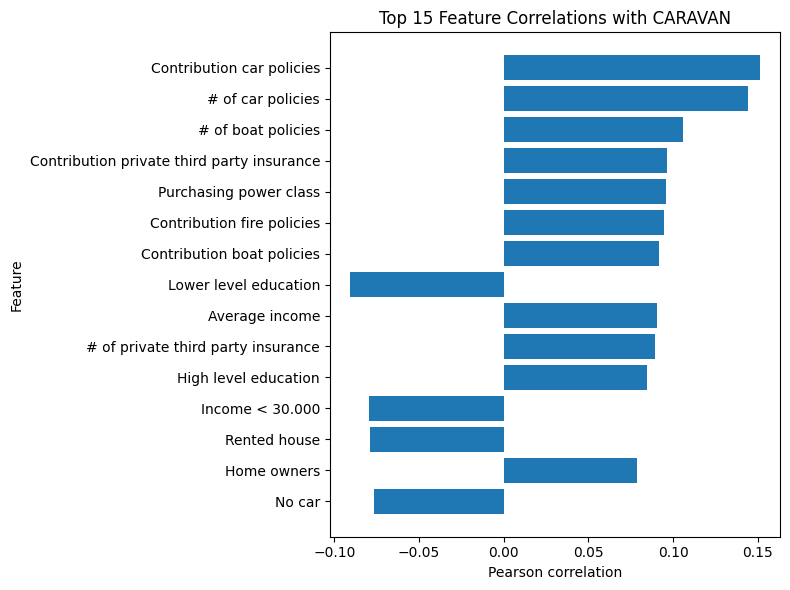

In [36]:
# ---------------------------
# 5) Simple correlations with the target (for intuition)
# ---------------------------
X = train.drop(columns=[TARGET])
y = train[TARGET].astype(int)

# Compute r for each numeric feature with y
corrs = []
for col in X.columns:
    # guard against zero variance
    if X[col].std() > 0:
        r = np.corrcoef(X[col], y)[0,1]
    else:
        r = 0.0
    corrs.append((col, r, abs(r)))

corr_df = pd.DataFrame(corrs, columns=["feature","corr_with_y","abs_corr"]).sort_values("abs_corr", ascending=False)
top15 = corr_df.head(15)
print("Top 15 features most correlated with the target variable:")
print(top15)

# Plot the top-15 correlations as a bar chart (single figure)
plt.figure(figsize=(8, 6))
plt.barh(top15["feature"][::-1], top15["corr_with_y"][::-1])
plt.title("Top 15 Feature Correlations with CARAVAN")
plt.xlabel("Pearson correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()